# [Module 1.1] 로컬 스크래치 훈련

본 워크샵의 모든 노트북은 `conda_python3` 여기에서 작업 합니다.

이 노트북은 아래와 같은 작업을 합니다.
- 아래는 세이지메이커의 어떤 피쳐도 사용하지 않고, PyTorch 만을 사용해서 훈련 합니다.

## 기본 세팅
사용하는 패키지는 import 시점에 다시 재로딩 합니다.

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
%store -r local_model_dir

### Download the CIFAR-10 dataset

In [10]:
from source.utils_cifar import get_train_data_loader, get_test_data_loader, imshow, classes

trainloader = get_train_data_loader()
testloader = get_test_data_loader()

100.0%

Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


### Data Preview

     deer      frog     plane       cat


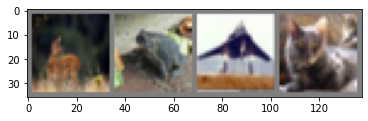

In [4]:
import numpy as np
import torchvision, torch

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(" ".join("%9s" % classes[labels[j]] for j in range(4)))

## 모델의 하이퍼파라미터 정의
- 하아퍼 파라미터 오브젝트 이름을 args 로 생성
    - 추후 SageMaker의 Script Mode 사용사에 args 오브젝트가 사용되기에, 이름을 맞추기 위해서 같은 이름을 사용 함
- 아래 파라미터는 로직 확인 용이기에, 훈련이 빨리 끝나기 위한 파라미터 값을 설정 함(에; learning rate)    

In [5]:
class Params:
    def __init__(self):
        self.workers = 2        
        self.epochs = 1
        self.batch_size = 4        
        self.lr = 0.1
        self.momentum = 0.9        
        self.dist_backend = 'gloo'        
        self.data_dir = '../data'        
        self.num_gpus = 1
        self.model_dir = local_model_dir
        self.current_host = 'dummy-currnet-host'
        self.hosts = 'dummpy-host'
                
args = Params()
print("# of epochs: ", args.epochs)
    

# of epochs:  1


## 로컬에서 스크래치 훈련

In [6]:
from importlib import reload
import source.train_lib
source.train_lib = reload(source.train_lib)
from source.train_lib import train



In [7]:
%%time 

train(args)

Distributed training - True
Device Type: cuda
Loading Cifar10 dataset
Model loaded
Gpu count: 4
[1,  2000] loss: 2.357
[1,  4000] loss: 2.359
[1,  6000] loss: 2.364
[1,  8000] loss: 2.356
[1, 10000] loss: 2.357
[1, 12000] loss: 2.358
Finished Training
Saving the model.
CPU times: user 2min 46s, sys: 25.8 s, total: 3min 12s
Wall time: 2min 1s
